## Logistic Regression with SGD

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from math import exp, log
import math
import os
import pickle

from skimage import io
from skimage.color import rgb2gray
from skimage.feature import hog

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.utils import shuffle

In [2]:
%matplotlib inline

### load the dataset

In [3]:
### set your image dir here
IMAGE_DIR = ".\data"

In [5]:
def load_dataset(subset="train"):
    """
    1. subset = "train", "val", "test"
    2. About the dataset: in "train","val" subset, the first half of images are images of hands, the rest half are images of not-hand. 
    3. extract features from HoG
    """
    path = os.path.join(IMAGE_DIR,subset)
    name_list = os.listdir(path)
    print("Number of images in {}-set: {}".format(subset, len(name_list)))
    #HoG returns 324 features
    X = np.zeros(shape=(len(name_list), 324))

    if subset == "train" or subset == "val":
        #Make sure that we have equal number of positive and negative class images
        assert len(name_list)%2 == 0
        count = len(name_list)//2
        y = np.array(count*[1] + count*[0])
        for idx_true in range(count):
            img_name = os.path.join(path,str(idx_true)+".png")
            img = io.imread(img_name)
            img = rgb2gray(img)
            vec = hog(img)
            X[idx_true, :] = vec
        
        for idx in range(count):
            idx_false = idx + count
            img_name = os.path.join(path,str(idx_false)+".png")
            img = io.imread(img_name)
            img = rgb2gray(img)
            vec = hog(img)
            X[idx_false, :] = vec
        return X, y        
    else:
        for idx in range(len(name_list)):
            img_name = os.path.join(path, str(idx)+".png")
            img = io.imread(img_name)
            img = rgb2gray(img)
            vec = hog(img)
            X[idx, :] = vec
        return X

### load the data

In [65]:
X_train, y_train = load_dataset("train")
X_val, y_val = load_dataset("val")
X_test = load_dataset("test")

Number of images in train-set: 8170


C:\ProgramData\Anaconda3\lib\site-packages\skimage\feature\_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


Number of images in val-set: 2724
Number of images in test-set: 5542


### displaying images

In [6]:
def display(img_path):
    """
    visualize the img
    """
    img = io.imread(img_path)
    print(img_path)
    io.imshow(img)
    io.show()

In [1]:
display(IMAGE_DIR+"train/1.png")

NameError: name 'IMAGE_DIR' is not defined

### Logistic regression

#### Main function in the class
1. \__init\__() which sets the hyper parameters
2. sigmoid()
3. __init_param(), initializes the parameters .
4. fit(): train the data
5. predict_proba(): predict the probability of the sample belonging to the positive class
6. predict(): classify the sample





In [105]:
class LogisticRegression:
    """
    Logistic Regression
    """
    def __init__(self, eta0=0.1, eta1=1, m=16, max_epoch=1000, delta=0.0001):
        """
        m is the batch_size
        """
        self.__init = True # whether to initial the parameters
        self.__eta0 = eta0
        self.__eta1 = eta1
        self.__delta = delta
        self.__m = m
        self.__max_epoch = max_epoch
        self.theta_list=[]
        
    def sigmoid(self, x):
        return 1.0 / (1 + np.exp(-x))
    
    def __init_param(self):
        """
        Weights initialized using a normal distribution here: you can change the distribution.
        """
        d = self.__dimension
        self.__wt = np.random.randn(1,d)
        self.__bias = np.random.randn()
        return self.__wt,self.__bias
    
    def fit(self, X, y, X_val=None, y_val=None):
        """
        Recommended input:
        X: n x d array,
        y: n x 1 array or list
        """
        n, d = X.shape
        self.__dimension = d
        
        if self.__init:
            self.__init_param()
        
        ### write your code here ### 
        wbar=np.vstack((self.__wt.T,self.__bias))
#         print(wbar.shape)
        wbar=np.asmatrix(wbar)
        Xbar=np.vstack((X.T,np.ones(n)))
        Xbar=Xbar.T
        Xbar=np.asmatrix(Xbar)
#         print(Xbar.shape)
        y=y.reshape((y.shape[0],1))
        y=np.asmatrix(y)
#         print(y.shape)
        ltheta_new=100000 #some big value for 1st iteration
        
        
        Xbar_val=np.vstack((Xbar.T,np.ones(n)))
        ltheta_list=[]
        for epoch in range(0,self.__max_epoch):
            eta=self.__eta0/(self.__eta1+epoch+1)
            Xbar, y = shuffle(Xbar, y)
            batch_s=0
            batch_e=self.__m+1
            batch=np.array_split(range(0,n), int(n/self.__m))
            for i in range(len(batch)):
                Xbatch=Xbar[batch[i],:]
                Ybatch=y[batch[i]]
                temp=np.subtract(self.sigmoid(Xbatch*wbar),Ybatch)
                gradient=np.multiply(temp,Xbatch)
                batch_gradient=gradient.sum(axis=0) / self.__m
                wbar=wbar - eta * batch_gradient.T
            
            ltheta_old=np.copy(ltheta_new)
            pr_1 = self.sigmoid(np.matmul(Xbar,wbar))
            pr_0 = 1-pr_1
            ltheta_new=(-1/n)*(np.matmul(y.T, np.log(pr_1))+np.matmul((1-y.T), np.log(pr_0)))
#             ltheta_new=(-1/n)*np.sum(np.multiply(y.T,Xbar*wbar)-log(self.sigmoid(Xbar*wbar)))
            ltheta_list.append(np.asscalar(ltheta_new))
#             if ltheta_new >(1-self.__delta)*ltheta_old:
#                 break
            self.theta_list.append(wbar)
        self.__wt=wbar[0:d]
        self.__bias=wbar[d]
            

        ############################
#         return ltheta_list
        return wbar
    
    def predict_proba(self, X):
        """
        predict the probility of the sample
        You can refer to my code below
        """
#         return a vector containing the probability values of the samples belonging to the positive class
        X=np.vstack((X.T,np.ones(n)))
        X=X.T
        wbar=np.vstack((self.__wt.T,self.__bias))
        return self.sigmoid(np.matmul(X,wbar))
         
    def predict(self, X):
              
        """
        Classify the sample
        """
#         return self.predict_proba(X) >= 0.5 # attention: this will give result in bool, you need to convert it to int for submission. 
       
    
        return int(self.predict_proba(X) >= 0.5)
    def get_param(self):
        """
        output:
            parameters: wt(1*d array), b(scalar)
        """
        return [self.__wt, self.__bias]
    
    def save_model(self, save_file):
        """
        save model to .pkl file
        """
        with open(save_file,"wb") as file:
            pickle.dump([self.__wt, self.__bias],file)

    def load_model(self, load_file):
        """
        load model from .pkl file
        """
        with open(load_file,"rb") as file:
            param = pickle.load(file)
        self.__wt = param[0]
        self.__bias = param[1]
        self.__init = False
        return self.__wt, self.__bias

## Question 2.3

### 1. Baseline Model

In [13]:
LR = LogisticRegression()
p=LR.fit(X_train,y_train)
len(p)

322

(a) Number of epochs till termination = 322

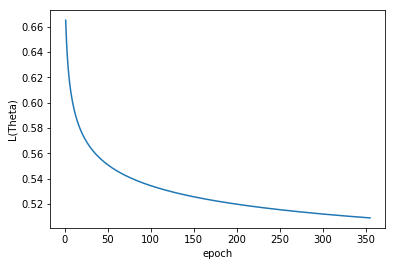

In [82]:
# (b) Plot L(theta) vs num_epochs
import matplotlib.pyplot as plt
LR = LogisticRegression()
ltheta=LR.fit(X_train,y_train)
plt.plot(range(1,len(ltheta)+1),ltheta)
plt.ylabel('L(Theta)')
plt.xlabel('epoch')
plt.show()


(c) Final value of L($\theta$) after optimization = 0.507

### 2. Experimenting with ($\eta_0$,$\eta_1$)

In [18]:
# Experimentation code goes here
eta0=[0.0001,0.001,0.01,0.1,1,10,100,1000]
eta1=[0.0001,0.001,0.01,0.1,1,10,100,1000]

for i in range(len(eta0)):
    for j in range(len(eta1)):
        LR = LogisticRegression(eta0[i],eta1[j])
        ltheta=LR.fit(X_train,y_train)
        print("eta0 ",eta0[i]," eta1 ",eta1[j],"  epoch  ",len(ltheta),"  L(theta) ",ltheta[-1])
        



eta0  0.0001  eta1  0.0001   epoch   24   L(theta)  0.713119250027102
eta0  0.0001  eta1  0.001   epoch   71   L(theta)  1.1793481073892245
eta0  0.0001  eta1  0.01   epoch   39   L(theta)  0.8636616234577169
eta0  0.0001  eta1  0.1   epoch   16   L(theta)  0.7489252301032864
eta0  0.0001  eta1  1   epoch   33   L(theta)  0.7628704637859299
eta0  0.0001  eta1  10   epoch   2   L(theta)  0.7199454577064355
eta0  0.0001  eta1  100   epoch   2   L(theta)  0.804198163500133
eta0  0.0001  eta1  1000   epoch   2   L(theta)  0.8332810489157819
eta0  0.001  eta1  0.0001   epoch   154   L(theta)  0.7779573429413065
eta0  0.001  eta1  0.001   epoch   274   L(theta)  0.8386267792472157
eta0  0.001  eta1  0.01   epoch   9   L(theta)  0.6761866550735257
eta0  0.001  eta1  0.1   epoch   11   L(theta)  0.7223126598471814
eta0  0.001  eta1  1   epoch   8   L(theta)  0.6896135274264242
eta0  0.001  eta1  10   epoch   450   L(theta)  0.9174456255445034
eta0  0.001  eta1  100   epoch   586   L(theta)  1.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:74: RuntimeWarning: divide by zero encountered in log
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:77: RuntimeWarning: invalid value encountered in greater


eta0  100  eta1  0.0001   epoch   19   L(theta)  0.2789684282465971
eta0  100  eta1  0.001   epoch   4   L(theta)  0.5255651913726863
eta0  100  eta1  0.01   epoch   11   L(theta)  0.31341453250114826
eta0  100  eta1  0.1   epoch   5   L(theta)  0.42696581836669845
eta0  100  eta1  1   epoch   4   L(theta)  0.3615367208480424
eta0  100  eta1  10   epoch   7   L(theta)  0.2858151013647442
eta0  100  eta1  100   epoch   11   L(theta)  0.30698086401432867
eta0  100  eta1  1000   epoch   90   L(theta)  0.3061311120709162


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in exp


eta0  1000  eta1  0.0001   epoch   99   L(theta)  0.3862654195994911
eta0  1000  eta1  0.001   epoch   100   L(theta)  0.39717749838436894
eta0  1000  eta1  0.01   epoch   90   L(theta)  0.4777092783089372
eta0  1000  eta1  0.1   epoch   65   L(theta)  0.4243701087678288
eta0  1000  eta1  1   epoch   30   L(theta)  0.49841602850006
eta0  1000  eta1  10   epoch   11   L(theta)  0.4320596978996049
eta0  1000  eta1  100   epoch   3   L(theta)  0.32923353992783694
eta0  1000  eta1  1000   epoch   10   L(theta)  0.3063089034274004


(a) Best value for, $\eta_0$ = 100 , $\eta_1$ = 0.0001

Number of epochs for training = 19

Final value of L($\theta$) = 0.2789

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:74: RuntimeWarning: divide by zero encountered in log
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:77: RuntimeWarning: invalid value encountered in greater


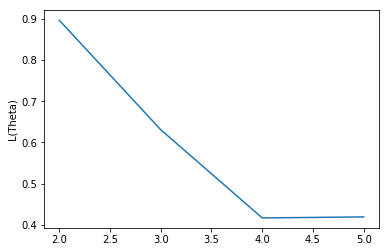

In [84]:
# (b) For best (eta_0, eta_1) plot L(theta) vs num_epochs
import matplotlib.pyplot as plt
LR = LogisticRegression(100,0.0001)
ltheta=LR.fit(X_train,y_train)
plt.plot(range(1,len(ltheta)+1),ltheta)
plt.ylabel('L(Theta)')
plt.show()

### 3. Evaluating on validation set

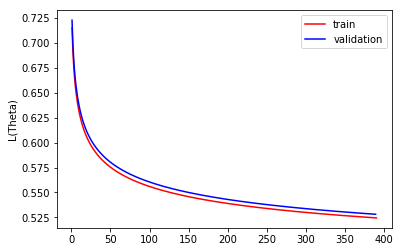

In [20]:
# (a) Plot L(theta) vs num_epochs for both training and validation set on the same figure
LR = LogisticRegression()
ltheta_train = LR.fit(X_train,y_train)
ltheta_val=[]
n, d = X_val.shape
Xbar=np.vstack((X_val.T,np.ones(n)))
for i in range(len(LR.theta_list)):
    pr_1 = LR.sigmoid(np.matmul(Xbar.T,LR.theta_list[i]))
    pr_0 = 1-pr_1
    ltheta_new=(-1/n)*(np.matmul(y_val.T, np.log(pr_1))+np.matmul((1-y_val.T), np.log(pr_0)))
    ltheta_val.append(np.asscalar(ltheta_new))
plt.plot(range(1,len(ltheta_train)+1),ltheta_train,color='red',label='train')
plt.plot(range(1,len(ltheta_val)+1),ltheta_val,color='blue',label='validation')
plt.ylabel('L(Theta)')
plt.legend()
plt.show()

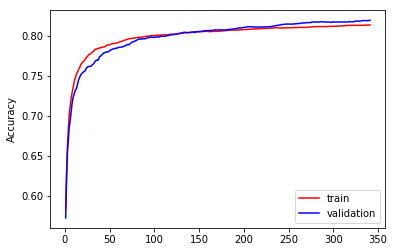

In [103]:
# (b) Plot Accuracy vs num_epochs for both training and validation set on the same figure
from sklearn.metrics import accuracy_score
LR = LogisticRegression()
ltheta_train = LR.fit(X_train,y_train)
n_val= X_val.shape[0]
n_train=X_train.shape[0]
Xbar_val=np.vstack((X_val.T,np.ones(n_val)))
Xbar_train=np.vstack((X_train.T,np.ones(n_train)))
Xbar_val=Xbar_val.T
Xbar_train=Xbar_train.T
Acc_train=[]
Acc_val=[]
for i in range(len(LR.theta_list)):
    Pred_train=(LR.sigmoid(np.matmul(Xbar_train,LR.theta_list[i]))>=0.5).astype(int)
    Pred_val_prob=LR.sigmoid(np.matmul(Xbar_val,LR.theta_list[i]))
    Pred_val=(LR.sigmoid(np.matmul(Xbar_val,LR.theta_list[i]))>=0.5).astype(int)
    Acc_train.append(accuracy_score(Pred_train,y_train))
    Acc_val.append(accuracy_score(Pred_val,y_val))
    
plt.plot(range(1,len(Acc_train)+1),Acc_train,color='red',label='train')
plt.plot(range(1,len(Acc_val)+1),Acc_val,color='blue',label='validation')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### 4. ROC and Precision-Recall curves

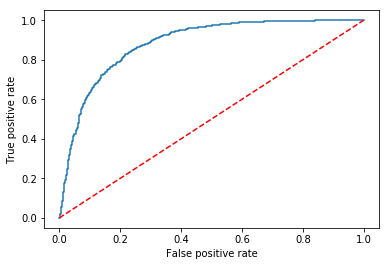

0.8822637091087865

In [102]:
#(a) Plot ROC curve on validation data
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
fpr, tpr,threshold = roc_curve(y_val, Pred_val_prob)
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'r--')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.show()
auc(fpr,tpr)

Area under curve = 0.89

0.8642646278529521

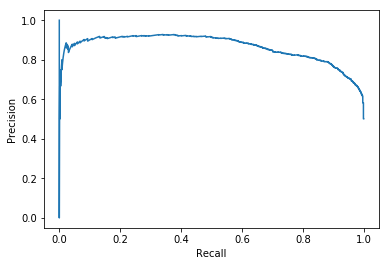

In [104]:
#(a) Plot Precision-Recall curve on validation data
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
precision,recall,threshold=precision_recall_curve(y_val,Pred_val_prob)
plt.plot(recall,precision)
plt.ylabel('Precision')
plt.xlabel('Recall')
average_precision_score(y_val,Pred_val_prob)

In [ ]:
Average Precision = 0.86

## Question 2.4

### 1. Submission

In [73]:
import pandas as pd
def submission(y_pred):
    """
    generate the submission.csv for kaggle
    input args:
        y_pred: 5542x1 array or list contains 5542 elements
        
    """
    
    save_file = pd.DataFrame(columns=["Id","Class"])
    id = np.array([idx for idx in range(5542)])
    save_file["Id"] = id
    save_file["Class"]= y_pred
    save_file.to_csv("submission.csv",index=0)       

#### Generate the submission.csv

In [106]:
# code goes here
y_train=y_train.reshape((y_train.shape[0],1))
y_val=y_val.reshape((y_val.shape[0],1))
Xbar=np.vstack((X_train,X_val))
Ybar=np.vstack((y_train,y_val))
LR = LogisticRegression(eta0=50, eta1=4, m=16, max_epoch=1000, delta=0.0001)
wbar = LR.fit(Xbar,Ybar)
# wbar=np.vstack((LR.__wt,LR.__bias))
Xtbar=np.vstack((X_test.T,np.ones(X_test.shape[0])))
Pred_val=(LR.sigmoid(np.matmul(Xtbar.T,wbar))>=0.5).astype(int)
submission(Pred_val)